In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
titanic = pd.read_csv("titanic_train.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking for total null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#age, cabin and embarked has missing values.. we will try to fix them

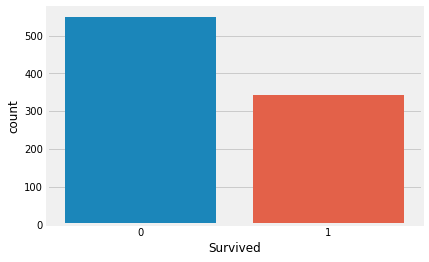

In [5]:
# how many survived

sns.countplot('Survived', data = titanic)

it is evident not many survived the disaster. 

([<matplotlib.patches.Wedge at 0x1be2c34ca48>,
 [Text(-0.3925749350994583, 1.0275626113924428, ''),
  Text(0.3925750313068116, -1.0275625746369201, '')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

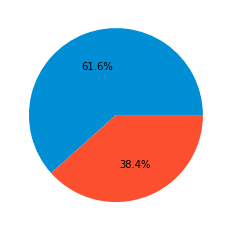

In [6]:
plt.pie(titanic.Survived.value_counts(), autopct='%1.1f%%')

# Analysing the features

Sex - Categorical Feature

In [7]:
titanic.groupby("Sex").Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

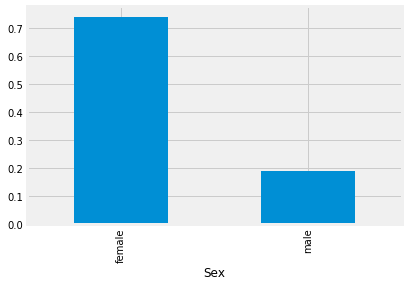

In [8]:
titanic.groupby(['Sex']).Survived.mean().plot.bar()

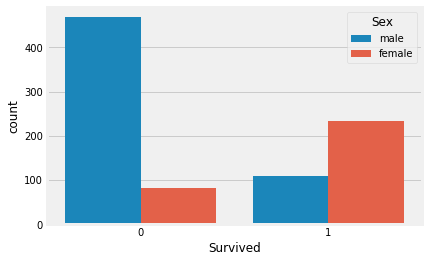

In [9]:
sns.countplot('Survived', data = titanic, hue="Sex")

Despite being more in numbers, more males have died in the disaster.
evident from the bar plot that only around 18-19% men survived while the survival rate among women are as high as 75-78%.

This looks like a important feature for modelling.

# Pclass -- Ordinal Feature

In [10]:
titanic.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

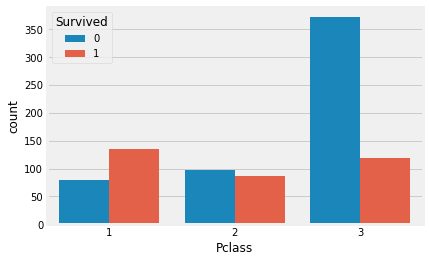

In [11]:
sns.countplot('Pclass', hue = 'Survived', data = titanic)

In [12]:
pd.crosstab([titanic.Sex,titanic.Pclass],titanic.Survived,margins=True)

Survived         0    1  All
Sex    Pclass               
female 1         3   91   94
       2         6   70   76
       3        72   72  144
male   1        77   45  122
       2        91   17  108
       3       300   47  347
All            549  342  891

The above crosstab shows that the women in the Pclass 1 or 2 had a very high chance of survival.
looks like Pclass is also an important feature for modelling.


# Age -- Continuous Features

In [13]:
print("Oldest passenger was of {} years.".format(titanic.Age.max()))
print("Youngest passenger was of {} years.".format(titanic.Age.min()))
print("Average age of passengers were {} year".format(round(titanic.Age.mean(),2)))

Oldest passenger was of 80.0 years.
Youngest passenger was of 0.42 years.
Average age of passengers were 29.7 year


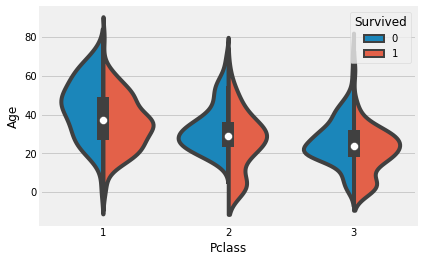

In [14]:
sns.violinplot("Pclass","Age", hue = 'Survived',data = titanic, split = True)

Two things are evident from the violin plot.
1. The no. of children increases with the Pclass and irrespective of Pclass the Survival rate of children below 10 years looks to be good.
2. The average age of people decreases with increase in the Pclass.

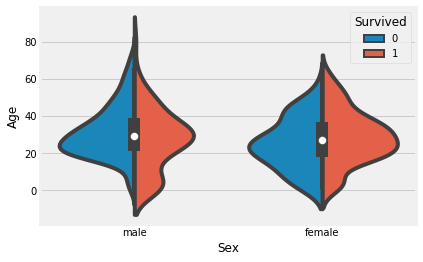

In [15]:
sns.violinplot("Sex", "Age", hue = "Survived",data = titanic, split = True)

1. The survival rate of men decreases with increase in their Age.
2. The age group of 20-50 has a high casuality and also high survival.


As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

In [16]:
titanic["Initial"] = 0
for i in titanic:
    titanic['Initial']=titanic.Name.str.extract('([A-Za-z]+)\.')

Okay so here we are using the Regex: [A-Za-z]+).. So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot). So we successfully extract the Initials from the Name.

In [17]:
pd.crosstab(titanic.Sex, titanic.Initial)

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [18]:
titanic['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [19]:
titanic.groupby('Initial').Age.mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [20]:
## Assigning the NaN Values with the Ceil values of the mean ages
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mr'),'Age'] = 33
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mrs'),'Age'] = 36
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Master'),'Age'] = 5
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Miss'),'Age'] = 22
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Other'),'Age'] = 46

In [21]:
titanic.Age.isnull().any()

False

# Embarked -- Categorical Variable

In [22]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

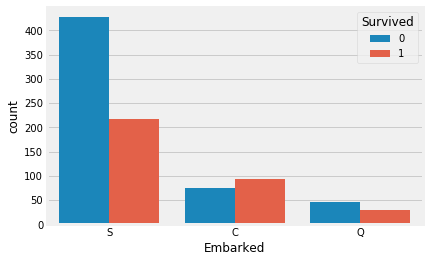

In [23]:
sns.countplot("Embarked", hue = 'Survived', data = titanic)

In [24]:
titanic.groupby(['Embarked','Survived']).Sex.value_counts()

Embarked  Survived  Sex   
C         0         male       66
                    female      9
          1         female     64
                    male       29
Q         0         male       38
                    female      9
          1         female     27
                    male        3
S         0         male      364
                    female     63
          1         female    140
                    male       77
Name: Sex, dtype: int64

In [25]:
titanic.groupby("Embarked").Pclass.value_counts()

Embarked  Pclass
C         1          85
          3          66
          2          17
Q         3          72
          2           3
          1           2
S         3         353
          2         164
          1         127
Name: Pclass, dtype: int64

From above we have come to a understanding that..
1. Female embarked from C have a very high survival rate.
2. Males in general have a very poor survival rate.
3. maximum passengers embarked from S and Q are from Pclass = 3.

# SibSp -- Discrete Variable

This feature represents whether a person is alone or with his family members.
siblings or spouse

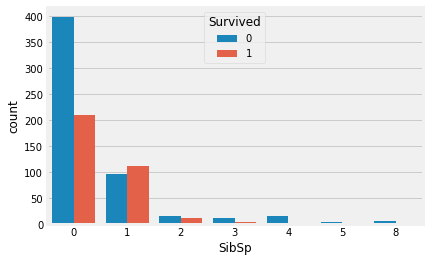

In [26]:
sns.countplot('SibSp', hue = "Survived", data = titanic)

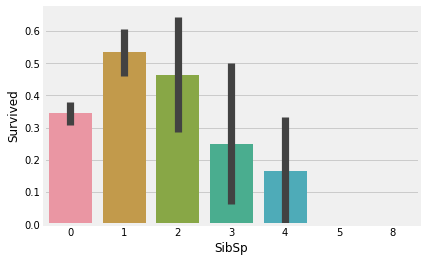

In [27]:
sns.barplot('SibSp', 'Survived', data = titanic)

In [28]:
pd.crosstab(([titanic.SibSp, titanic.Survived]),titanic.Pclass )

Pclass           1   2    3
SibSp Survived             
0     0         60  70  268
      1         77  50   83
1     0         18  23   56
      1         53  32   27
2     0          1   4   10
      1          4   4    5
3     0          1   0   11
      1          2   1    1
4     0          0   0   15
      1          0   0    3
5     0          0   0    5
8     0          0   0    7

The following observations can be made..
1. the barplot shows people have no siblings have 34% survival rate.
2. if people are in a pair(having one sibling or spouse) generally couples have the maximum chance of survival i.e more than 50%.
3. Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

# Parch -- 

In [29]:
pd.crosstab([titanic.Parch, titanic.Survived], titanic.Pclass).style.background_gradient(cmap = 'twilight')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


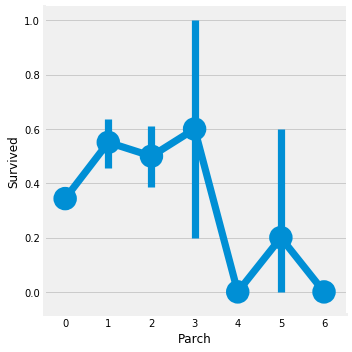

In [30]:
sns.factorplot('Parch', 'Survived', data = titanic)

It is evident from the factor plot that Parch <= 3 have much better survival rate but being alone is also comparitively fatal.
Therefore bigger families couldnt be saved and mostly they were from Pclass = 3.

# Fare -- Continous Feature

In [31]:
print("The maximum fare was {}".format(titanic.Fare.max()))
print("The minimum fare was {}".format(titanic.Fare.min()))
print("The average fare was {}".format(round(titanic.Fare.mean(),2)))

The maximum fare was 512.3292
The minimum fare was 0.0
The average fare was 32.2


In [32]:
#passenger class 1 fare
pclass1_fare = titanic[titanic.Pclass == 1].Fare
pclass2_fare = titanic[titanic.Pclass == 2].Fare
pclass3_fare = titanic[titanic.Pclass == 3].Fare

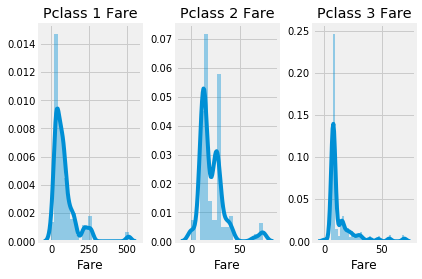

In [33]:
ax = plt.subplot(1,3,1)
sns.distplot(pclass1_fare)
plt.title("Pclass 1 Fare")
ax = plt.subplot(1,3,2)
sns.distplot(pclass2_fare)
plt.title("Pclass 2 Fare")
ax = plt.subplot(1,3,3)
sns.distplot(pclass3_fare)
plt.title("Pclass 3 Fare")
plt.subplots_adjust(wspace=0.35)

# Correlation betweeen features

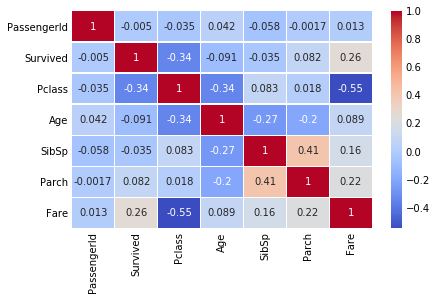

In [34]:
sns.heatmap(titanic.corr(), annot = True, cmap = 'coolwarm', linewidth = 0.2)

Interpreting The Heatmap ---

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

# Feature Engineering and Data Cleaning

Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

# Age_group

Problem With Age Feature:
As I have mentioned earlier that Age is a continous feature, there is a problem with Continous Variables in Machine Learning Models.

Eg:If I say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.

Now if I say to group them by their Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.

In [35]:
titanic['Age_group'] = 0

In [36]:
titanic.loc[titanic['Age'] <= 16, 'Age_group'] = 0
titanic.loc[(titanic['Age'] > 16) & (titanic['Age'] <= 32), 'Age_group'] = 1
titanic.loc[(titanic['Age'] > 32) & (titanic['Age'] <= 48), 'Age_group'] = 2
titanic.loc[(titanic['Age'] > 48) & (titanic['Age'] <= 64), 'Age_group'] = 3
titanic.loc[(titanic['Age'] > 64), 'Age_group'] = 4
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [37]:
pd.crosstab(titanic.Age_group, titanic.Survived).style.background_gradient(cmap = 'twilight')

Survived,0,1
Age_group,,
0,47,57
1,232,150
2,221,104
3,39,30
4,10,1


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


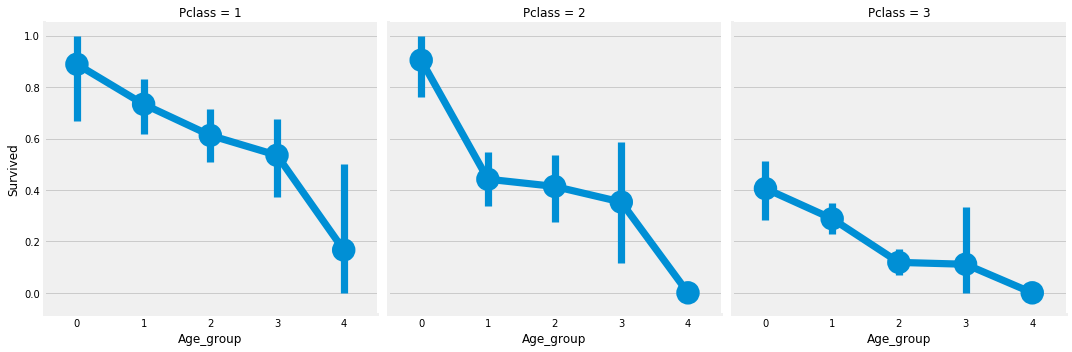

In [38]:
sns.factorplot('Age_group','Survived',data=titanic,col='Pclass')

Irrespective of the Pclass, the survival rate decreases with increase in age.

# Family_Size and Alone

At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

In [39]:
titanic['Family_Size'] = titanic.Parch + titanic.SibSp
titanic['Alone'] = 0
titanic.loc[titanic.Family_Size == 0, 'Alone'] = 1

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


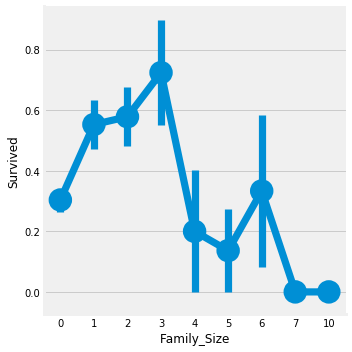

In [40]:
sns.factorplot(y = 'Survived', x = 'Family_Size', data = titanic)

Family_Size=0 means that the passeneger is alone. Clearly, if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


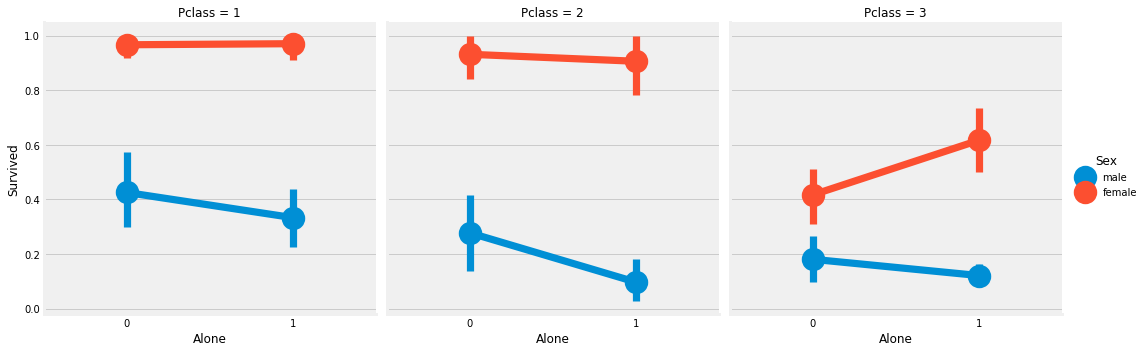

In [41]:
sns.factorplot(x='Alone', y='Survived', hue='Sex', data= titanic, col='Pclass')

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

# Fare_Range

Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.

So what qcut does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [42]:
titanic['Fare_Range'] = pd.qcut(titanic.Fare, 4)

In [43]:
titanic.groupby(titanic.Fare_Range).Survived.mean().to_frame().style.background_gradient(cmap = 'twilight')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed above, we can clearly see that as the fare_range increases, the chances of survival increases.

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band

In [44]:
titanic['Fare_cat'] = 0

In [45]:
titanic.loc[titanic['Fare'] < 7.91, 'Fare_cat'] = 0
titanic.loc[(titanic['Fare'] >= 7.91) & (titanic['Fare'] < 14.454), 'Fare_cat'] = 1
titanic.loc[(titanic['Fare'] >= 14.454) & (titanic['Fare'] < 31.0), 'Fare_cat'] = 2
titanic.loc[(titanic['Fare'] >= 31.0) & (titanic['Fare'] < 513), 'Fare_cat'] = 3


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


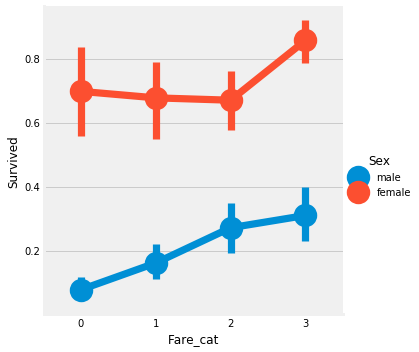

In [46]:
sns.factorplot('Fare_cat','Survived',data=titanic,hue='Sex')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

# Converting String Values into Numeric


Since we cannot pass strings to a machine learning model, we need to convert features like Sex, Embarked, etc into numeric values.



In [47]:
titanic['Sex'].replace(['male','female'],[0,1],inplace=True)
titanic['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
titanic['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [48]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_group,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0,2,0,1,"(7.91, 14.454]",1


# Dropping not needed Features

In [49]:
titanic.drop(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range'], axis = 1, inplace = True)

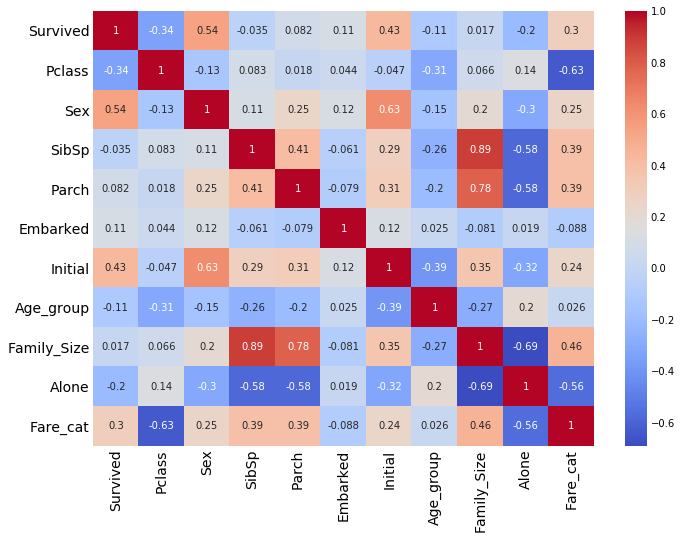

In [54]:
sns.heatmap(titanic.corr(), annot = True, cmap = 'coolwarm')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()